In [1]:
import sys
import os

# Add the directory to the search path
sys.path.append('../code')
sys.path.append('..')

In [2]:
import constants
print(os.getcwd())
os.environ["OPENAI_API_KEY"]=constants.OPENAI_API_KEY

c:\Users\linda.hemmann\Documents\FullTextTagging\notebooks


In [3]:
from pre_processing import extract_main_text
from custom_types import Paper
from utils import visualize_boxes

In [4]:
print('current directory: ' + os.getcwd())
data_path='../data/demo_data/'
files = [f for f in os.listdir(data_path) if f.endswith('.pdf')]
print('demofiles:')
for file in files:
    print(file)

current directory: c:\Users\linda.hemmann\Documents\FullTextTagging\notebooks
demofiles:
1-s2.0-S0090825815002577-main.pdf
1-s2.0-S014341799790086X-main.pdf
1-s2.0-S0167814004005663-main.pdf
1-s2.0-S1525730414002630-main.pdf
paper0.pdf
paper1.pdf
paper2.pdf
paper4.pdf
PII_ S0196-9781(97)00323-9.pdf
PII_ S1368-8375(98)00013-X.pdf


# Test creating a paper object and filling the data

In [5]:
pdf_path = data_path+files[1]
paper = Paper(pdf_path = pdf_path)
paper.read_paper()

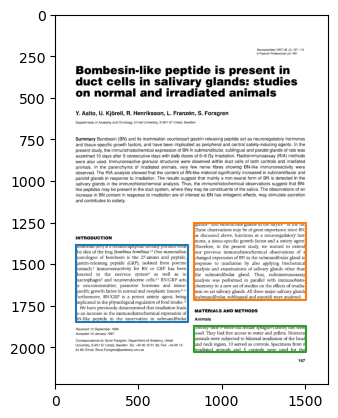

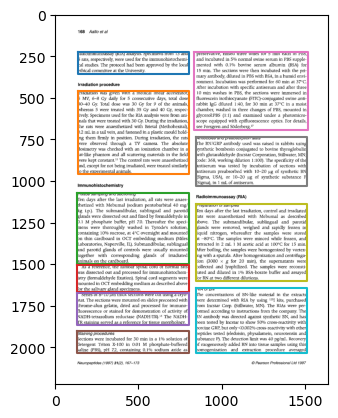

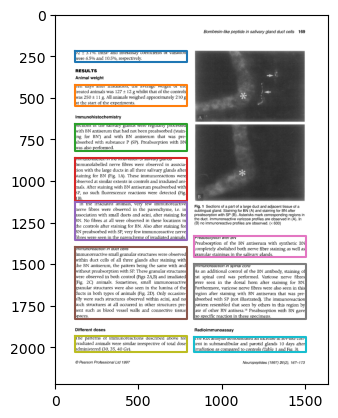

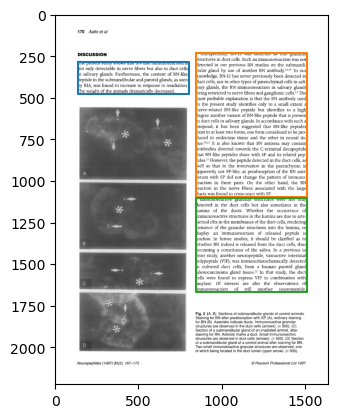

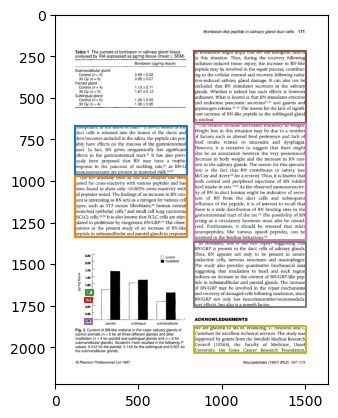

In [6]:
visualize_boxes(pdf_path = pdf_path, texts=paper.main_text , relative=False)

In [7]:
print(paper.main_text)
paper.embed_paper()

[Text(text='Bombesin (BN) is a tetradecapeptide initially purified from \nthe skin of the frog Bombina bombina. 1,2 One mammalian \nhomologue  of bombesin  is  the  27-amino  acid  peptide, \ngastrin-releasing  peptide  (GRP),  isolated  from  porcine \nstomach. 3 Immunoreactivity  for  BN  or  GRP  has  been \ndetected  in  the  nervous  system 4  as  well  as  in \nmacrophages 5 and  neuroendocrine  cellsY BN/GRP acts \nas  neurotransmitter,  paracrine  hormone  and  tissue- \nspecific growth factor in normal and neoplastic tissues. 8-~1 \nFurthermore,  BN/GRP  is  a  potent  satiety  agent,  being \nimplicated in the physiological regulation of food intake.~2 \nWe have previously demonstrated that irradiation leads \nto an increase in the immunohistochemical expression of \nBN-like  peptide  in  the  innervation  in  submandibular \n', page=0, bbox=[43.92, 498.0032, 286.757376, 664.5632], doc=None, embeddings=None), Text(text='glands ~3 and submucosal glands in the larynx ~4 of the 

In [8]:
print(paper.main_text)

[Text(text='Bombesin (BN) is a tetradecapeptide initially purified from \nthe skin of the frog Bombina bombina. 1,2 One mammalian \nhomologue  of bombesin  is  the  27-amino  acid  peptide, \ngastrin-releasing  peptide  (GRP),  isolated  from  porcine \nstomach. 3 Immunoreactivity  for  BN  or  GRP  has  been \ndetected  in  the  nervous  system 4  as  well  as  in \nmacrophages 5 and  neuroendocrine  cellsY BN/GRP acts \nas  neurotransmitter,  paracrine  hormone  and  tissue- \nspecific growth factor in normal and neoplastic tissues. 8-~1 \nFurthermore,  BN/GRP  is  a  potent  satiety  agent,  being \nimplicated in the physiological regulation of food intake.~2 \nWe have previously demonstrated that irradiation leads \nto an increase in the immunohistochemical expression of \nBN-like  peptide  in  the  innervation  in  submandibular \n', page=0, bbox=[43.92, 498.0032, 286.757376, 664.5632], doc=None, embeddings=[-0.037424664825581, 0.005689010471668505, 0.00340933561173877, 0.00076413

In [9]:
matches = paper.get_relevant_chapter("Is this study performed with humans, animals or in-vitro")

In [14]:
for match in matches:
    print(match)
    print(match.page_content)
    #visualize_boxes(pdf_path = pdf_path, texts=match.main_text , relative=False)

page_content='radioimmunoassay (RIA) analysis. Specimens from 13 and \n5 rats, respectively, were used for the immunohistochemi- \ncal studies. The protocol had been approved by the local \nethical committee at the University. \n' metadata={'page': 1, 'bbox': [49.44, 81.41528000000005, 290.09497760000005, 127.73527999999999], 'doc': None}
radioimmunoassay (RIA) analysis. Specimens from 13 and 
5 rats, respectively, were used for the immunohistochemi- 
cal studies. The protocol had been approved by the local 
ethical committee at the University. 

page_content='Twenty-nine 9-week-old female Sprague-Dawley rats were \nused. They had free access to water and pellets. Nineteen \nanimals were subjected to bilateral irradiation of the head \nand neck region, 10 served as controls. Specimens from 6 \nirradiated  animals  and  5  controls  were  used  for  the \n' metadata={'page': 0, 'bbox': [301.2, 673.4431999999999, 542.4310399999999, 731.2832], 'doc': None}
Twenty-nine 9-week-old female Sp

In [15]:
matches2 = paper.get_relevant_chapter("Is there evidence that the study does not include ionising radiation health/biological effects* ?")
for match in matches2:
    print(match)
    print(match.page_content)


page_content='Twenty-nine 9-week-old female Sprague-Dawley rats were \nused. They had free access to water and pellets. Nineteen \nanimals were subjected to bilateral irradiation of the head \nand neck region, 10 served as controls. Specimens from 6 \nirradiated  animals  and  5  controls  were  used  for  the \n' metadata={'page': 0, 'bbox': [301.2, 673.4431999999999, 542.4310399999999, 731.2832], 'doc': None}
Twenty-nine 9-week-old female Sprague-Dawley rats were 
used. They had free access to water and pellets. Nineteen 
animals were subjected to bilateral irradiation of the head 
and neck region, 10 served as controls. Specimens from 6 
irradiated  animals  and  5  controls  were  used  for  the 

page_content='Irradiation was  given with  a  medical linear  accelerator, \n6  MV,  6-8  Gy daily for  5  consecutive  days, total  dose \n30-40  Gy. Total  dose  was  30  Gy for 9  of the  animals, \nwhereas  5 were treated with  35  Gy and  40  Gy, respec- \ntively. Specimens used for 

In [16]:
matches2 = paper.get_relevant_chapter("Is the study about the effect on the central nervous system?")
for match in matches2:
    print(match)
    print(match.page_content)

page_content='The  treated  animals  decreased  markedly  in  weight. \nWeight loss in this  situation  may be  due  to  a number \nof factors  such  as  altered food preference and  lack  of \nfood  intake  related  to  mucositis  and  dysphagia. \nHowever,  it  is  tentative  to  suggest  that  there  might \nalso  be  an  association  between  the  very pronounced \ndecrease  in  body weight  and  the  increase  in  BN con- \ntent in the salivary glands. The reason for this specula- \ntion  is  the  fact  that  BN  contributes  to  satiety  (see \nMcCoy and Avery 3+ for a review). Thus, it is known that \nboth  central  and  peripheral  injections  of  BN  inhibit \nfood intake in rats. 3z38 As the observed immunoreactiv- \nity of BN in duct lumina  might be indicative  of secre- \ntion  of  BN  from  the  duct  cells  and  subsequent \ninfluence  of the  peptide,  it is  of interest  to recall that \nthere  is a wide  distribution  of BN binding  sites in the \ngastrointestinal tra

In [17]:
matches2 = paper.get_relevant_chapter("Are all the subjects exposed to other chemical, biological or physical agents then radiation ?")
for match in matches2:
    print(match)
    print(match.page_content)

page_content='The  patterns  of  immunoreactions  described  above  for \nirradiated animals were similar irrespective of total dose \nadministered (30, 35, 40 Gy). \n' metadata={'page': 2, 'bbox': [43.44, 696.4832, 285.2617502879999, 729.8432], 'doc': None}
The  patterns  of  immunoreactions  described  above  for 
irradiated animals were similar irrespective of total dose 
administered (30, 35, 40 Gy). 

page_content='Irradiation was  given with  a  medical linear  accelerator, \n6  MV,  6-8  Gy daily for  5  consecutive  days, total  dose \n30-40  Gy. Total  dose  was  30  Gy for 9  of the  animals, \nwhereas  5 were treated with  35  Gy and  40  Gy, respec- \ntively. Specimens used for the RIA analysis were from ani- \nmals that were treated with 30 Gy. During the irradiation, \nthe  rats  were  anaesthetized with  Brietal  (Methohexital), \n0.2 mL in a tail vein, and fastened in a plastic mould hold- \ning them  firmly in position. During irradiation, the  rats \nwere  observed  t